# EDA and Feature Engineering

## Handling Outliers - Introduction

**Different Methods:**
- z-Score or Standard Score
- LOF (Local Outlier Factor)
- Geometric (Angle based and Depth based)
- Isolation Forest
- ODIN

**Packages in Python:**

There are different methods to detect and handle outliers. PyOD, package_outlier, PyNomaly, sklearn, alibi-detect etc in Python can be used for detection of various methods for outlier detection.

**Example: Package_outlier:**

Assume data is your desired dataset / dataframe that you are trying to analyze for outliers. You can leverage package_outliers library to detect outliers.

- import package_outlier as po
- result = po.ZscoreOutlier(data)
- result = po.ModifiedZscoreOutlier(data)
- result = po.LocalOutlierFactorOutlier(data)
- result = po.DepthOutlier(data)
- result = po.KmeansOutlier(data)
- result = po.OdinOutlier(data)
- result = po.RegressionOutlier(data)
- result = po.SvmOutlier(data)
- result = po.PcaOutlier(data)
- result = po.KnnOutlier(data)
- result = po.AngleOutlier(data)

## 1. Z-score 

Zscore is a common method to detect anomaly in 1-D. For a given data point zscore is calculated by:
zscore = data_point - mean / std_dev

### Using conventional computation

In [1]:
# Libraries used
import numpy as np
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Sample data
data = [1, 2, 3, 2, 1, 80, 1, 2, 3, 2, 1]

In [3]:
# Calculate the z-score from scipy
zscores = stats.zscore(data)
print(zscores)

[-0.35163644 -0.30717666 -0.26271688 -0.30717666 -0.35163644  3.16068615
 -0.35163644 -0.30717666 -0.26271688 -0.30717666 -0.35163644]


In [4]:
# Add the SD based threshold to be computed
threshold = 3

mean = np.mean(data)
std = np.std(data)

z_score_outlier = [i for i in data if (i-mean)/std > threshold]
print (z_score_outlier)

[80]


In [5]:
# Display the Standard Deviation
std

22.49223924926731

In [6]:
# Calculate the z-score from scratch
zscores = [(value - mean) / std for value in data]

print(zscores)

[-0.3516364387484696, -0.30717665913659414, -0.26271687952471867, -0.30717665913659414, -0.3516364387484696, 3.160686150589693, -0.3516364387484696, -0.30717665913659414, -0.26271687952471867, -0.30717665913659414, -0.3516364387484696]


### Using in-built package

In [7]:
import package_outlier as po # This is pypi package for outlier detection (check how it is detected)
result = po.ZscoreOutlier(data)

result

[80]

### Modified Zscore based outlier detection

Mean and standard deviation are themselves prone to outliers that's why we use median instead of mean and median absolute deviation instead of mean absolute deviation.

Consider the data (1, 1, 2, 2, 4, 6, 9). It has a median value of 2. The absolute deviations about 2 are (1, 1, 0, 0, 2, 4, 9) which in turn have a median value of 1 (because the sorted absolute deviations are (0, 0, 1, 1, 2, 4, 7)). So the median absolute deviation for this data is 1.

In [8]:
data_modified = [1,1,2,2,4,6,11]

data_modified

[1, 1, 2, 2, 4, 6, 11]

In [9]:
median_modified = np.median(data_modified)
median_modified

2.0

In [10]:
mean_modified = np.mean(data_modified)

mean_modified

3.857142857142857

In [11]:
result = po.ModifiedZscoreOutlier(data_modified)

result

[11]

## 2. LOF

Unsupervised Outlier Detection using the Local Outlier Factor (LOF).

The anomaly score of each sample is called the Local Outlier Factor. It measures the local deviation of the density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood. More precisely, locality is given by k-nearest neighbors, whose distance is used to estimate the local density. By comparing the local density of a sample to the local densities of its neighbors, one can identify samples that have a substantially lower density than their neighbors. These are considered outliers.

### Using sklearn library

In [12]:
from sklearn.neighbors import LocalOutlierFactor

data = [[-1.1], [0.2], [101.1], [0.3]]


In [13]:
# parameter: n_neighbors => Number of neighbors to use by default for kneighbors queries. 
# If n_neighbors is larger than the number of samples provided, all samples will be used.
# parameter: metric => can be any of the distance measures

clf = LocalOutlierFactor(n_neighbors=2, metric='euclidean')
clf.fit_predict(data)

array([ 1,  1, -1,  1])

from scikit-learn: [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’]

from scipy.spatial.distance: [‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘correlation’, ‘dice’, ‘hamming’, ‘jaccard’, ‘kulsinski’, ‘mahalanobis’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’]

You can refer to documentation for scipy.spatial.distance for details on these metrics: https://docs.scipy.org/doc/scipy/reference/spatial.distance.html.

In [14]:
clf.negative_outlier_factor_

array([ -0.9821,  -1.037 , -73.3697,  -0.9821])

In [15]:
lof = LocalOutlierFactor(n_neighbors=2, metric='euclidean')
prediction = lof.fit_predict(data)
prediction

array([ 1,  1, -1,  1])

### Another example using sklearn with mpg dataset

In [16]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
mpg = sns.load_dataset('mpg')

In [17]:
mpg.sample(4)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
271,23.2,4,156.0,105.0,2745,16.7,78,usa,plymouth sapporo
367,28.0,4,112.0,88.0,2605,19.6,82,usa,chevrolet cavalier
183,25.0,4,116.0,81.0,2220,16.9,76,europe,opel 1900
260,18.6,6,225.0,110.0,3620,18.7,78,usa,dodge aspen


In [18]:
mpg = mpg.fillna(method='pad')

In [19]:
# Setting up the model. K is set by passing the n_neighbors parameter with integer. 
# 20 is often considered good already to detect an outlier. By default the distance metric is Euclidean distance.
lof = LocalOutlierFactor(n_neighbors = 20)

# Training the model, we drop few columns that was not a continuous variable
mpg['lof'] = lof.fit_predict(mpg.drop(['cylinders', 'model_year', 'origin', 'name'], axis = 1))

# Getting the negative LOF score
mpg['negative_outlier_factor'] = lof.negative_outlier_factor_
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,lof,negative_outlier_factor
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,1,-1.059168
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,1,-1.002389
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,1,-1.020426
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,1,-0.986678
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,1,-0.985915
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,1,-1.032756
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,1,-0.990920
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,1,-1.084042
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,1,-0.964386


Below is the result, where we get the LOF classification and negative LOF score. If lof equal to 1, then it is considered as an inlier; if it is -1, then it is an outlier. Let’s try to get all the outlier data.

In [20]:
mpg[mpg['lof'] == -1]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,lof,negative_outlier_factor
13,14.0,8,455.0,225.0,3086,10.0,70,usa,buick estate wagon (sw),-1,-2.315950
42,12.0,8,383.0,180.0,4955,11.5,71,usa,dodge monaco (sw),-1,-1.614997
44,13.0,8,400.0,175.0,5140,12.0,71,usa,pontiac safari (sw),-1,-2.105323
54,35.0,4,72.0,69.0,1613,18.0,71,japan,datsun 1200,-1,-2.049279
90,12.0,8,429.0,198.0,4952,11.5,73,usa,mercury marquis brougham,-1,-1.621830
95,12.0,8,455.0,225.0,4951,11.0,73,usa,buick electra 225 custom,-1,-1.640116
103,11.0,8,400.0,150.0,4997,14.0,73,usa,chevrolet impala,-1,-1.711404
104,12.0,8,400.0,167.0,4906,12.5,73,usa,ford country,-1,-1.523431
144,31.0,4,76.0,52.0,1649,16.5,74,japan,toyota corona,-1,-1.793795


The contamination or outlier depends on the LOF score. By default, if the score of the negative_outlier_score is less than -1.5, it would be considered as the outlier.


### Using Package_Outlier library

In [21]:
data = [[-1.1], [0.2], [101.1], [0.3]]

result = po.LocalOutlierFactorOutlier(data)
result

[]

In [22]:
data = [[-1.1], [0.2], [101.1], [0.3], [-1.1], [0.2], [2.1], [0.3], [-1.1], [0.2],
       [-1.1], [0.2], [0.7], [0.3], [-1.1], [0.2], [2.1], [0.3], [-1.1], [0.2], [1.4], [-1.2]]

In [23]:
result = po.LocalOutlierFactorOutlier(data)
result

[[101.1]]

## 3. Geometric (Angle-based and Depth-based)

**Angle Based Outlier Detection:**

For a normal point the angle it makes with any other two data points varies a lot as you choose different data points. For an anomaly the angle it makes with any other two data points doesn’t vary much as you choose different data points Here we used cosθ to calculate angle between 2 vectors.

**Depth Based Outlier Detection:**

Outliers lie at the edge of the data space. According to this concept we organize the data in layers in which each layer is labeled by its depth. The outermost layer is depth = 1, the next is depth = 2 and so on. Finally outliers are those points with a depth below a predetermined threshold. This implementation uses a convex hull to implement this depth based method. Convex hull is defined as the smallest convex set that contains the data. This method is typically efficient only for two and three dimensional data. Outliers are points with a depth ≤ n.

### Angle Based and Cluster Based OD using a sample dataset

In [24]:
import seaborn as sns
import pandas as pd
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

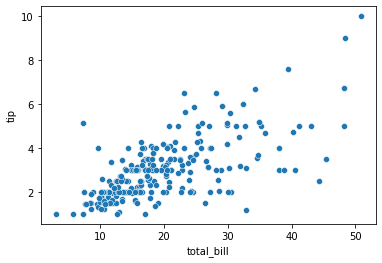

In [25]:
sns.scatterplot(data = df, x = 'total_bill', y = 'tip')

In [26]:
# Let's look at these two for example
from pyod.models.abod import ABOD # Angle-Based Outlier Detection
from pyod.models.cblof import CBLOF # Cluster-Based Local Outlier Factor

Let’s start with the ABOD model; we need to set the contamination parameter or the fraction number of outliers detected from our data. If I set the contamination to 0.05, I want to detect 5% of outliers from our data. Let’s try it with our code.

In [27]:
outliers_fraction = 0.05
abod_clf = ABOD(contamination=outliers_fraction)
abod_clf.fit(df[['total_bill', 'tip']])

ABOD(contamination=0.05, method='fast', n_neighbors=5)

In [28]:
#Return the classified inlier/outlier
abod_clf.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0])

In [29]:
cblof_clf = CBLOF(contamination=outliers_fraction,check_estimator=False)
cblof_clf.fit(df[['total_bill', 'tip']])

df['ABOD_Clf'] = abod_clf.labels_
df['CBLOF_Clf'] = cblof_clf.labels_

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

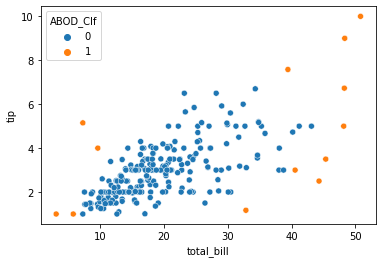

In [30]:
sns.scatterplot(data = df, x = 'total_bill', y = 'tip', hue = 'ABOD_Clf')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

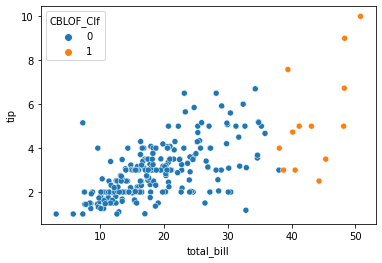

In [31]:
sns.scatterplot(data = df, x = 'total_bill', y = 'tip', hue = 'CBLOF_Clf')

**Inference:** As we could observe, different from ABOD, the CBLOF algorithm classified the outer part as on the one side (right-side) as far as detection of outliers are concerned.

### Bonus example (ABOD and kNN) - please explore these later

In [32]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from pyod.models.ecod import ECOD # Unsupervised Outlier Detection Using Empirical Cumulative Distribution Functions
from pyod.models.abod import ABOD # Angle-Based Outlier Detection
from pyod.models.knn import KNN # k Nearest Neighbors (use the distance to the kth nearest neighbor as the outlier score

%matplotlib inline
import matplotlib.font_manager

In [33]:
from pyod.utils.data import generate_data, get_outliers_inliers

#generate random data with two features
X_train, Y_train = generate_data(n_train=200,train_only=True, n_features=2)

# by default the outlier fraction is 0.1 in generate data function 
outlier_fraction = 0.1

# store outliers and inliers in different numpy arrays
x_outliers, x_inliers = get_outliers_inliers(X_train,Y_train)

n_inliers = len(x_inliers)
n_outliers = len(x_outliers)

Text(0, 0.5, 'F2')

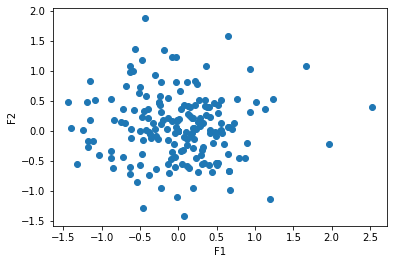

In [34]:
#separate the two features and use it to plot the data 
F1 = X_train[:,[0]].reshape(-1,1)
F2 = X_train[:,[1]].reshape(-1,1)

# create a meshgrid 
xx , yy = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))

# scatter plot 
plt.scatter(F1,F2)
plt.xlabel('F1')
plt.ylabel('F2') 

In [35]:
classifiers = {
     'Angle-based Outlier Detector (ABOD)'   : ABOD(contamination=outlier_fraction),
     'K Nearest Neighbors (KNN)' :  KNN(contamination=outlier_fraction)
}

No of Errors :  Angle-based Outlier Detector (ABOD) 20
No of Errors :  K Nearest Neighbors (KNN) 34


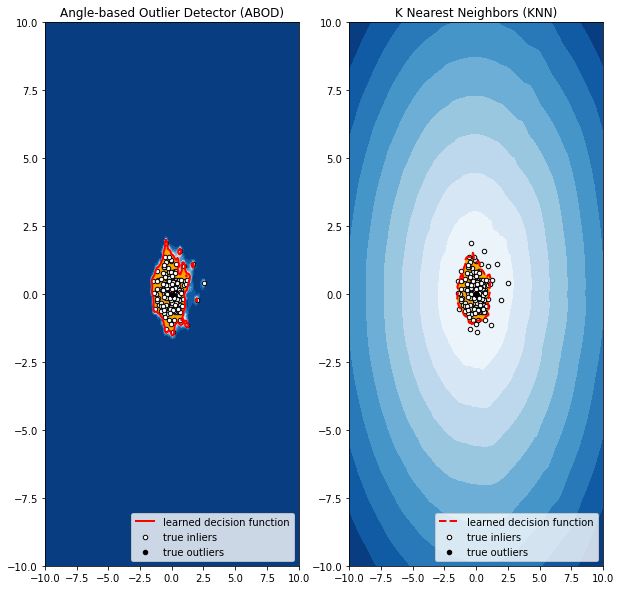

In [36]:
#set the figure size
plt.figure(figsize=(10, 10))

for i, (clf_name,clf) in enumerate(classifiers.items()) :
    # fit the dataset to the model
    clf.fit(X_train)

    # predict raw anomaly score
    scores_pred = clf.decision_function(X_train)*-1

    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X_train)

    # no of errors in prediction
    n_errors = (y_pred != Y_train).sum()
    print('No of Errors : ',clf_name, n_errors)

    # rest of the code is to create the visualization

    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 *outlier_fraction)

    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)

    subplot = plt.subplot(1, 2, i + 1)

    # fill blue colormap from minimum anomaly score to threshold value
    subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(), threshold, 10),cmap=plt.cm.Blues_r)

    # draw red contour line where anomaly score is equal to threshold
    a = subplot.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')

    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')

    # scatter plot of inliers with white dots
    b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c='white',s=20, edgecolor='k') 
    # scatter plot of outliers with black dots
    c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], c='black',s=20, edgecolor='k')
    subplot.axis('tight')

    subplot.legend(
        [a.collections[0], b, c],
        ['learned decision function', 'true inliers', 'true outliers'],
        prop=matplotlib.font_manager.FontProperties(size=10),
        loc='lower right')

    subplot.set_title(clf_name)
    subplot.set_xlim((-10, 10))
    subplot.set_ylim((-10, 10))
plt.show() 

## 4. Isolation Forest

### From sklearn.ensemble

In [37]:
from sklearn.ensemble import IsolationForest
data = [[1, 1], [2, 2.1], [1, 2], [2, 1], [50, 35], [2, 1.5]]
iforest = IsolationForest(n_estimators=5)
iforest.fit(data)

IsolationForest(n_estimators=5)

In [38]:
actual_data = [[2, 2.1]]
iforest.predict(actual_data)

array([1])

In [39]:
outlier_data = [[50, 35]]
iforest.predict(outlier_data)

array([-1])

## 5. ODIN

In [40]:
import package_outlier as po
data = [[1, 1], [2, 2.1], [1, 2], [2, 1], [50, 35], [2, 1.5]]
result = po.LocalOutlierFactorOutlier(data)
print (result)

[]


## 6. Others

### PyNomaly

PyNomaly is a python package to detect outliers based on the LoOP (Local Outlier Probabilities). The LoOP is based on the Local Outlier Factor (LOF), but the scores are normalized to the range [0–1]. 

Please refer here for details: https://github.com/vc1492a/PyNomaly

In [41]:
from PyNomaly import loop
m = loop.LocalOutlierProbability(df[['total_bill', 'tip']], use_numba=True, progress_bar=True).fit()
scores = m.local_outlier_probabilities

[ ================================================================================== ] 100.00%

We could use_numba here if there are many datasets to predict; otherwise, we could turn it off. The training resulted in the probabilities which we could infer by ourselves.

Every data contains probability as an outlier. We could try to infer by our judgment for which dataset is an outlier, for example, the data point with probability higher than 0.5

In [42]:
scores

array([0.8295626248076025, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12557328522681865,
       0.0, 0.02111877349884709, 0.05971962913200672, 0.0, 0.0,
       0.1889108765535523, 0.0, 0.06600125149215222, 0.08897813994035837,
       0.0, 0.02042050638068777, 0.0, 0.0, 0.1871981997484898, 0.0,
       0.134984637364615, 0.3267729747731968, 0.0, 0.014754813315752954,
       0.0, 0.0, 0.09586482494356348, 0.007619109801460211,
       0.40445432467905096, 0.047451955204303224, 0.05153640905209838,
       0.060915134218719226, 0.0, 0.026685478007354643, 0.0, 0.0,
       0.08235121925900077, 0.0, 0.0, 0.015489001395435478,
       0.06119981869025086, 0.29147060866687485, 0.0, 0.0,
       0.14773230352113922, 0.11948852580728307, 0.011734703518409457,
       0.0, 0.11247993297359739, 0.6362082484982708, 0.0, 0.0, 0.0,
       0.13388412917733344, 0.0752232735787891, 0.3193641733521855,
       0.034714585817508775, 0.14889677586825573, 0.0,
       0.027255806435112006, 0.07093755060492847, 0.0, 0.0, 0.0,
     

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

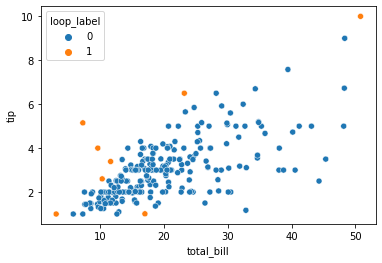

In [43]:
df['loop_score'] = scores
df['loop_label'] = df['loop_score'].apply(lambda x: 1 if x >0.5 else 0)
sns.scatterplot(data = df, x = 'total_bill', y = 'tip', hue = 'loop_label')

That's all for now.

This is the end of the notebook. 

As we have noticed there are plethora of methods, packages and we need to practice with sample scenarios to be able to learn these better. Happy Learning!!